# Data processing

Processing of results

In [1]:
import os
import phd
import h5py
import glob
import math
import tables
import numpy as np
import pandas as pd
import seaborn as sns
import phd.saveFiles as sF
import matplotlib as mpl
import phd.plotsTFM as plots
import matplotlib.pyplot as plt
import phd.methodsTFM as methods
from sklearn.preprocessing import label_binarize

From the neural cepstral coefficients generated, a dimensionality reduction is performed by PCA. The reduction is compared between z-scoring and non z-scoring the data while changing the number of filters from 2 to 32. The number of cepstra populations changes as the number of filters changes, but at 13 it stops increasing.

In [4]:
n_filters_vector = np.arange(31, dtype=int)+2

n_cepstra_vector = np.ones(31, dtype=int)
n_cepstra_vector[:12] = np.arange(12, dtype=int)+2
n_cepstra_vector[12:] = n_cepstra_vector[12:]*13
ncomp_v = np.zeros(len(n_filters_vector))
ncomp_scaled = np.zeros(len(n_filters_vector))

for x in np.arange(len(n_filters_vector)):
    path='/Volumes/LeandroLV/TFM/results/ncc-b=1.019-power=3.000/consonants,nfilters%d,ncepstra%d,seed20' %(n_filters_vector[x],n_cepstra_vector[x])
    X, Y, Y_train_binarized, Y_test_binarized, _,_,_,_ = phd.saveFiles.load_results(path)
    if X.shape[1]<=1000:
        ncomp_v[x], ncomp_scaled[x], _, _ = phd.methodsTFM.PCA_scaled_noscaled_components(X,X.shape[1],0.95)
    else:    
        ncomp_v[x], ncomp_scaled[x], _, _ = phd.methodsTFM.PCA_scaled_noscaled_components(X,1000,0.95)

The file consonants,nfilters2,ncepstra2,seed20.h5 has the next items:
data_ncc
data_ncc/test
data_ncc/train
y_labels
y_labels/y_test_binarized
y_labels/y_train_binarized
('X_train size: ', (1277, 430))
('Y_train size: ', (1277,))
('Y_test size: ', (660, 430))
('X_test size: ', (660,))
('Full dataset: ', (1937, 430))
('Full labels: ', (1937,))
The file consonants,nfilters3,ncepstra3,seed20.h5 has the next items:
data_ncc
data_ncc/test
data_ncc/train
y_labels
y_labels/y_test_binarized
y_labels/y_train_binarized
('X_train size: ', (1277, 645))
('Y_train size: ', (1277,))
('Y_test size: ', (660, 645))
('X_test size: ', (660,))
('Full dataset: ', (1937, 645))
('Full labels: ', (1937,))
The file consonants,nfilters4,ncepstra4,seed20.h5 has the next items:
data_ncc
data_ncc/test
data_ncc/train
y_labels
y_labels/y_test_binarized
y_labels/y_train_binarized
('X_train size: ', (1277, 860))
('Y_train size: ', (1277,))
('Y_test size: ', (660, 860))
('X_test size: ', (660,))
('Full dataset: ', (1937

('X_train size: ', (1277, 2795))
('Y_train size: ', (1277,))
('Y_test size: ', (660, 2795))
('X_test size: ', (660,))
('Full dataset: ', (1937, 2795))
('Full labels: ', (1937,))
The file consonants,nfilters26,ncepstra13,seed20.h5 has the next items:
data_ncc
data_ncc/test
data_ncc/train
y_labels
y_labels/y_test_binarized
y_labels/y_train_binarized
('X_train size: ', (1277, 2795))
('Y_train size: ', (1277,))
('Y_test size: ', (660, 2795))
('X_test size: ', (660,))
('Full dataset: ', (1937, 2795))
('Full labels: ', (1937,))
The file consonants,nfilters27,ncepstra13,seed20.h5 has the next items:
data_ncc
data_ncc/test
data_ncc/train
y_labels
y_labels/y_test_binarized
y_labels/y_train_binarized
('X_train size: ', (1277, 2795))
('Y_train size: ', (1277,))
('Y_test size: ', (660, 2795))
('X_test size: ', (660,))
('Full dataset: ', (1937, 2795))
('Full labels: ', (1937,))
The file consonants,nfilters28,ncepstra13,seed20.h5 has the next items:
data_ncc
data_ncc/test
data_ncc/train
y_labels
y_l

<Figure size 396x324 with 0 Axes>

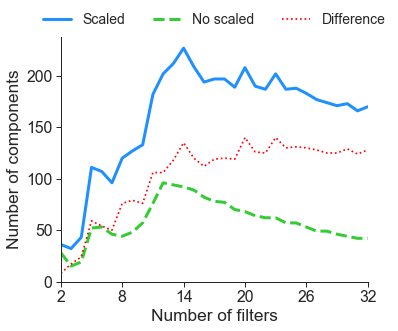

In [5]:
phd.plots.setup(figsize=(5.5,4.5))
sns.set_style({"axes.spines.right": False})
sns.set_style({"axes.spines.top": False})
sns.set_context("paper",font_scale=1.8, rc={"lines.linewidth": 3})
sns.despine()

fig = plt.figure()
ax = plt.gca()
n_filters_vector = np.arange(31, dtype=int)+2
plt.plot(n_filters_vector,ncomp_scaled,'dodgerblue',label='Scaled')
plt.plot(n_filters_vector,ncomp_v,'limegreen', linestyle='--',label='No scaled')
plt.plot(n_filters_vector,ncomp_scaled-ncomp_v,linestyle=':',lw=1.7,color='red',
        label='Difference')

plt.ylabel('Number of components')
plt.xlabel('Number of filters')
plt.ylim(0)

ax.set_xticks(np.linspace(2,32,6, dtype=int))
ax.set_xticklabels(np.linspace(2,32,6, dtype=int))
plt.xlim(2,32)

lg=plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.15), fancybox=True, 
              shadow=False, frameon=False, prop={'size': 14})
plt.show()

fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/PCA-scaled-noscaled-filters-95CEV.svg',
           bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

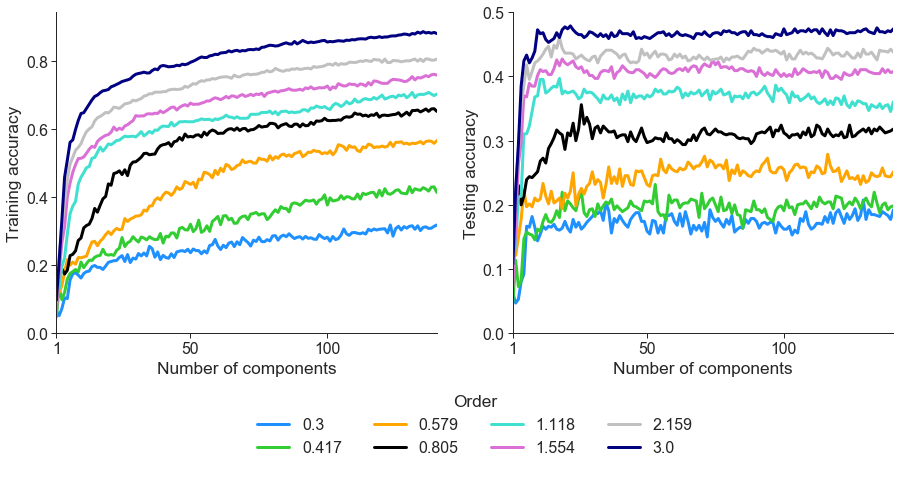

In [3]:
name = "/Volumes/LeandroLV/TFM/results/PCA_SVM-b=1.019-power=%.3f/consonants,nfilters32,ncepstra13,seed20,C=10_gamma=0.01_rbf.pkl"
power = np.array([0.300, 0.417, 0.579, 0.805, 1.118, 1.554, 2.159, 3.000])
path = []

for i in power:
    path.append(name%(i))
    
fig = phd.plotsTFM.plot_acc_ncomp(path, list(power), xlimupper=140, legtitle="Order")
fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/order_Acc_Ncomp.svg',
        bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

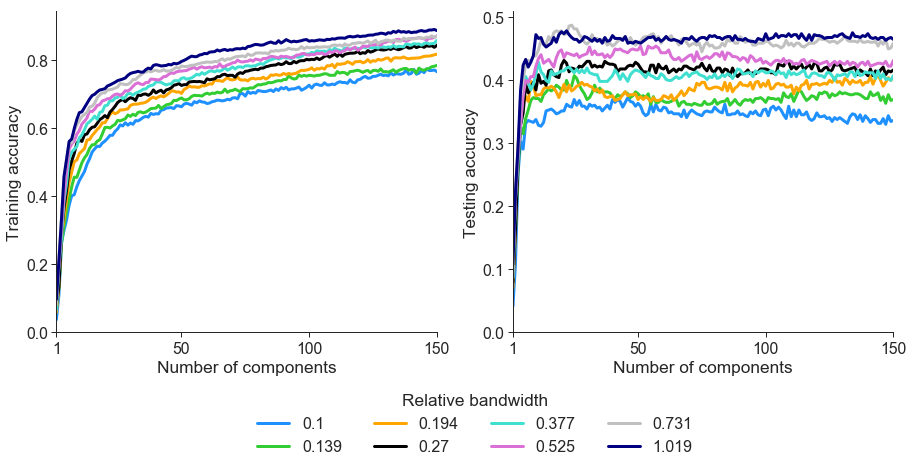

In [13]:
name = "/Volumes/LeandroLV/TFM/results/PCA_SVM-b=%.3f-power=3/consonants,nfilters32,ncepstra13,seed20,C=10_gamma=0.01_rbf.pkl"         
bw = np.array([0.100, 0.139, 0.194, 0.270, 0.377, 0.525, 0.731, 1.019])        
path = []

for i in bw:
    path.append(name%(i))
    
fig = phd.plotsTFM.plot_acc_ncomp(path, list(bw), xlimupper=150, legtitle="Relative bandwidth")
fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/rel_bandwidth_Acc_Ncomp.svg',
             bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

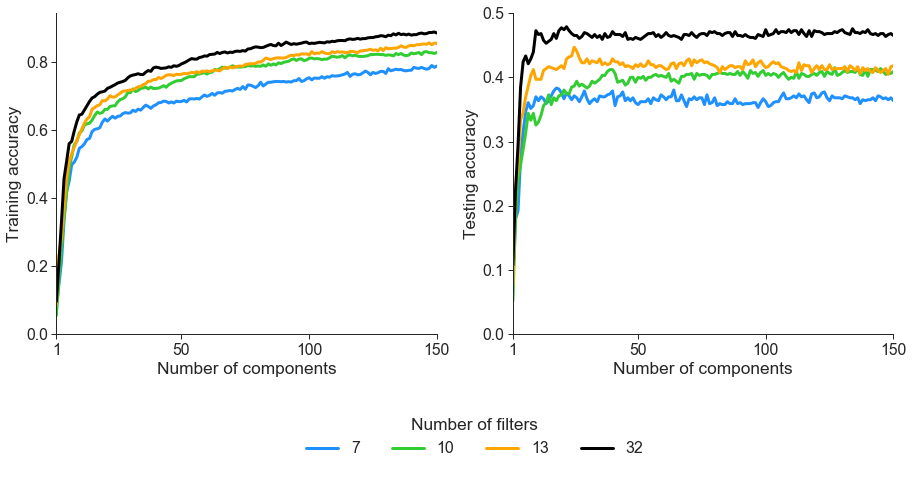

In [6]:
name = "/Volumes/LeandroLV/TFM/results/PCA_SVM-b=1.019-power=3.000/consonants,nfilters%d,ncepstra%d,seed20,C=10_gamma=0.01_rbf.pkl"
filters = np.array([7, 10, 13, 32])
cepstra = np.array([7, 10, 13, 13])
path = []

for i in range(len(filters)):
    path.append(name%(filters[i],cepstra[i]))
    
fig = phd.plotsTFM.plot_acc_ncomp(path,list(filters),legtitle="Number of filters",xlimupper=150)
fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/RBF-kernel-Filters.svg',
        bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

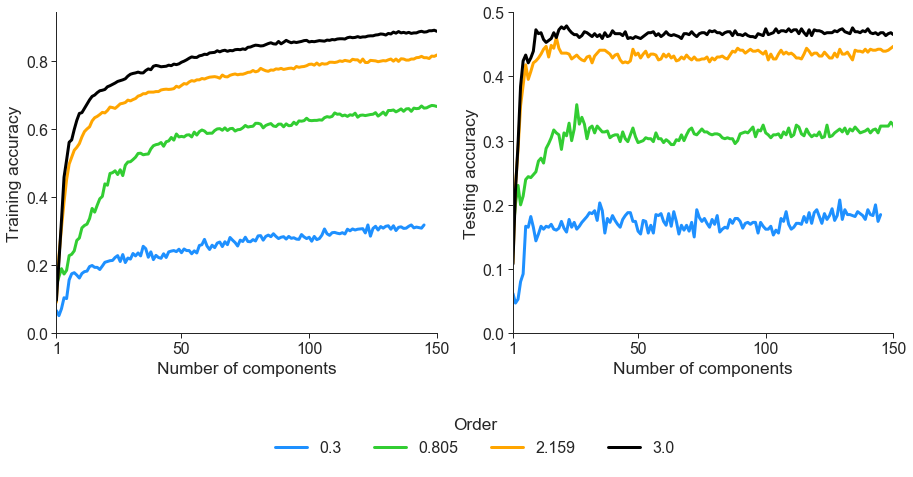

In [7]:
name = "/Volumes/LeandroLV/TFM/results/PCA_SVM-b=1.019-power=%.3f/consonants,nfilters32,ncepstra13,seed20,C=10_gamma=0.01_rbf.pkl"
power = np.array([0.300, 0.805, 2.159, 3.000])
path = []

for i in power:
    path.append(name%(i))

fig = phd.plotsTFM.plot_acc_ncomp(path, list(power), xlimupper=150, legtitle="Order")
fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/order_Acc_Ncomp-V2.svg',
        bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

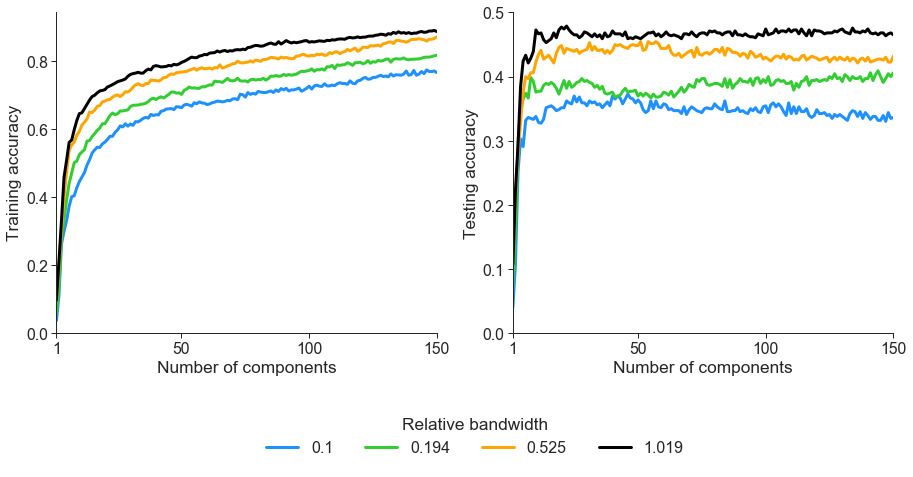

In [12]:
name = "/Volumes/LeandroLV/TFM/results/PCA_SVM-b=%.3f-power=3/consonants,nfilters32,ncepstra13,seed20,C=10_gamma=0.01_rbf.pkl"         
bw = np.array([0.100, 0.194, 0.525, 1.019])        
path = []

for i in bw:
    path.append(name%(i))
    
fig = phd.plotsTFM.plot_acc_ncomp(path, list(bw), xlimupper=150, legtitle="Relative bandwidth")
fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/rel_bandwidth_Acc_Ncomp-V2.svg',
             bbox_inches='tight', format='svg')

## ROC CURVES

In [11]:
name = "/Volumes/LeandroLV/TFM/results/PCA_SVM-b=%.3f-power=3/consonants,nfilters32,ncepstra13,seed20,C=10_gamma=0.01_rbf.h5"         
bw = np.array([0.100, 0.139, 0.194, 0.270, 0.377, 0.525, 0.731, 1.019])        
path_bw = []

for i in bw:
    path_bw.append(name%(i))
    
name = "/Volumes/LeandroLV/TFM/results/PCA_SVM-b=1.019-power=%.3f/consonants,nfilters32,ncepstra13,seed20,C=10_gamma=0.01_rbf.h5"
power = np.array([0.300, 0.417, 0.579, 0.805, 1.118, 1.554, 2.159, 3.000])
path_pw = []

for i in power:
    path_pw.append(name%(i))    

<Figure size 1080x936 with 0 Axes>

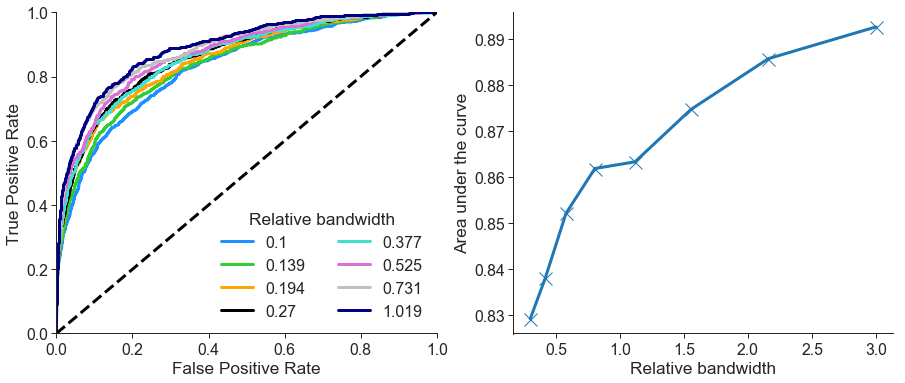

In [12]:
labels= list(bw)
clrs = ['dodgerblue','limegreen', 'orange', 'black', 'turquoise', 'orchid', 'silver', 'navy'] 
area_micro = np.zeros(len(labels))
consonants = phd.timit.TIMIT.consonants

phd.plots.setup(figsize=(15, 13))
sns.set_style({"axes.spines.right": False})
sns.set_style({"axes.spines.top": False})
sns.set_context("paper",font_scale=1.8, rc={"lines.linewidth": 3})
sns.despine()

fig = plt.figure(); plt.subplot(221); ax1 = plt.gca()

for i in range(len(path_bw)):
    results=phd.saveFiles.read_file(path_bw[i]);
    test_binarized = phd.saveFiles.load_dataset\
                    (results, 'y_labels/y_test_binarized')
    test_scores = phd.saveFiles.load_dataset\
                    (results, 'y_score/y_score_test')
    fpr, tpr, roc_auc = methods.ROC_curve\
                        (test_binarized, test_scores[-1], \
                        consonants)
    
    plt.plot(fpr["micro"], tpr["micro"], color=clrs[i],
             label =labels[i])
    area_micro[i] = roc_auc["micro"]
    
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0,1)
plt.ylim(0,1)
leg1 = ax1.legend(loc="lower right",ncol=2, fancybox=True, title='Relative bandwidth', 
                  shadow=False, frameon=False, prop={'size': 16})

plt.subplot(222); ax2 = plt.gca()

ordr=np.logspace(math.log10(0.3),math.log10(3),num=8)
plt.plot(ordr,area_micro,'-x',markersize=13)
plt.ylabel('Area under the curve')
plt.xlabel('Relative bandwidth')

fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/ROC_curve_bandwidth.svg',
        bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

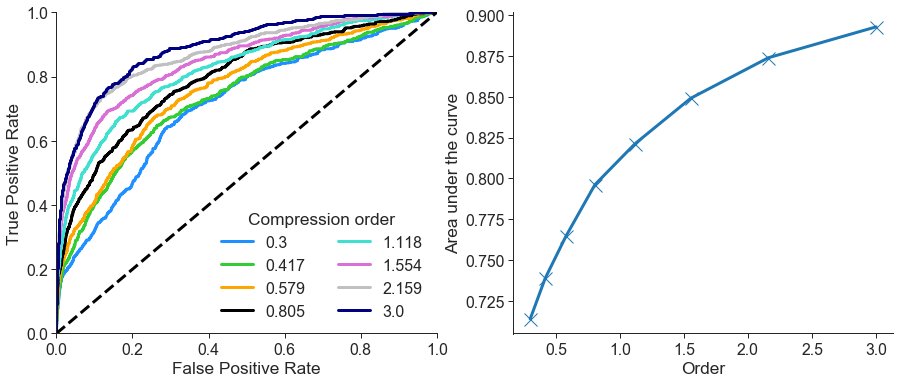

In [3]:
labels = list(power)    
clrs = ['dodgerblue','limegreen', 'orange', 'black', 'turquoise', 'orchid', 'silver', 'navy'] 
area_micro = np.zeros(len(labels))
consonants = phd.timit.TIMIT.consonants

phd.plots.setup(figsize=(15, 13))
sns.set_style({"axes.spines.right": False})
sns.set_style({"axes.spines.top": False})
sns.set_context("paper",font_scale=1.8, rc={"lines.linewidth": 3})
sns.despine()

fig = plt.figure(); plt.subplot(221); ax1 = plt.gca()

for i in range(len(path_pw)):
    results=phd.saveFiles.read_file(path_pw[i]);
    test_binarized = phd.saveFiles.load_dataset\
                    (results, 'y_labels/y_test_binarized')
    test_scores = phd.saveFiles.load_dataset\
                    (results, 'y_score/y_score_test')
    fpr, tpr, roc_auc = methods.ROC_curve\
                        (test_binarized, test_scores[-1], \
                        consonants)
    
    plt.plot(fpr["micro"], tpr["micro"], color=clrs[i],
             label =labels[i])
    area_micro[i] = roc_auc["micro"]
    
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0,1)
plt.ylim(0,1)
leg1 = ax1.legend(loc="lower right",ncol=2, fancybox=True, title='Compression order', 
                  shadow=False, frameon=False, prop={'size': 16})

plt.subplot(222); ax2 = plt.gca()

ordr=np.logspace(math.log10(0.3),math.log10(3),num=8)
plt.plot(ordr,area_micro,'-x',markersize=13)
plt.ylabel('Area under the curve')
plt.xlabel('Order')

fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/ROC_curve_Order.svg',
        bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

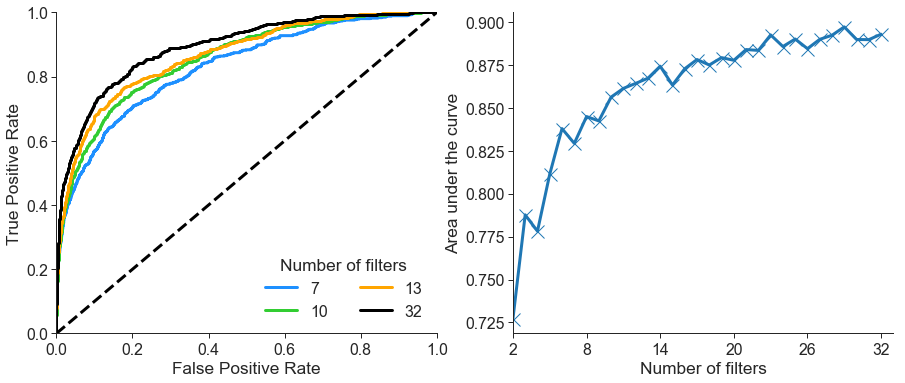

In [4]:
path = sorted(glob.glob("/Volumes/LeandroLV/TFM/results/PCA_SVM-b=1.019-power=3.000/*.h5"), key=os.path.getmtime)

filters = np.array([7, 10, 13, 32])
labels=list(filters);
clrs = ['dodgerblue','limegreen', 'orange', 'black', 'turquoise', 'orchid', 'silver', 'navy']
x = np.arange(31, dtype=int)+2
area_micro = np.zeros(len(x))
consonants = phd.timit.TIMIT.consonants
phd.plots.setup(figsize=(15, 13))
sns.set_style({"axes.spines.right": False})
sns.set_style({"axes.spines.top": False})
sns.set_context("paper",font_scale=1.8, rc={"lines.linewidth": 3})
sns.despine()

fig = plt.figure(); plt.subplot(221); ax1 = plt.gca()

for i in range(len(path)):
    results=phd.saveFiles.read_file(path[i]);
    test_binarized = phd.saveFiles.load_dataset\
                    (results, 'y_labels/y_test_binarized')
    test_scores = phd.saveFiles.load_dataset\
                    (results, 'y_score/y_score_test')
    fpr, tpr, roc_auc = methods.ROC_curve\
                        (test_binarized, test_scores[-1], \
                        consonants)
    area_micro[i] = roc_auc["micro"]

for i in range(len(labels)):
    results=phd.saveFiles.read_file(path[filters[i]-2]);
    test_binarized = phd.saveFiles.load_dataset\
                    (results, 'y_labels/y_test_binarized')
    test_scores = phd.saveFiles.load_dataset\
                    (results, 'y_score/y_score_test')
    fpr, tpr, roc_auc = methods.ROC_curve\
                        (test_binarized, test_scores[-1], \
                        consonants)
    plt.plot(fpr["micro"], tpr["micro"], color=clrs[i],
                 label =labels[i])    
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0,1)
plt.ylim(0,1)
leg1 = ax1.legend(loc="lower right",ncol=2, fancybox=True, title='Number of filters', 
                  shadow=False, frameon=False, prop={'size': 16})

plt.subplot(222); ax2 = plt.gca()

ordr=np.logspace(math.log10(0.3),math.log10(3),num=8)
plt.plot(x,area_micro,'-x',markersize=13)
plt.ylabel('Area under the curve')
plt.xlabel('Number of filters')
ax2.set_xticks(np.linspace(2,32,6, dtype=int))
ax2.set_xticklabels(np.linspace(2,32,6, dtype=int))
plt.xlim(2,33)

fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/ROC_curve_filters.svg',
        bbox_inches='tight', format='svg')

## Confusion matrices

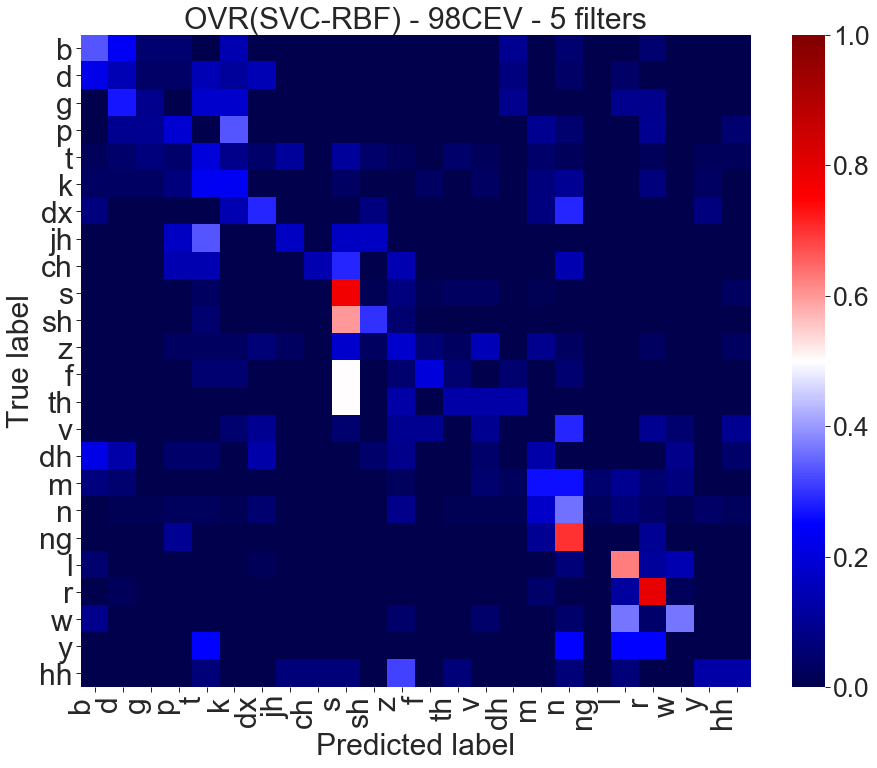

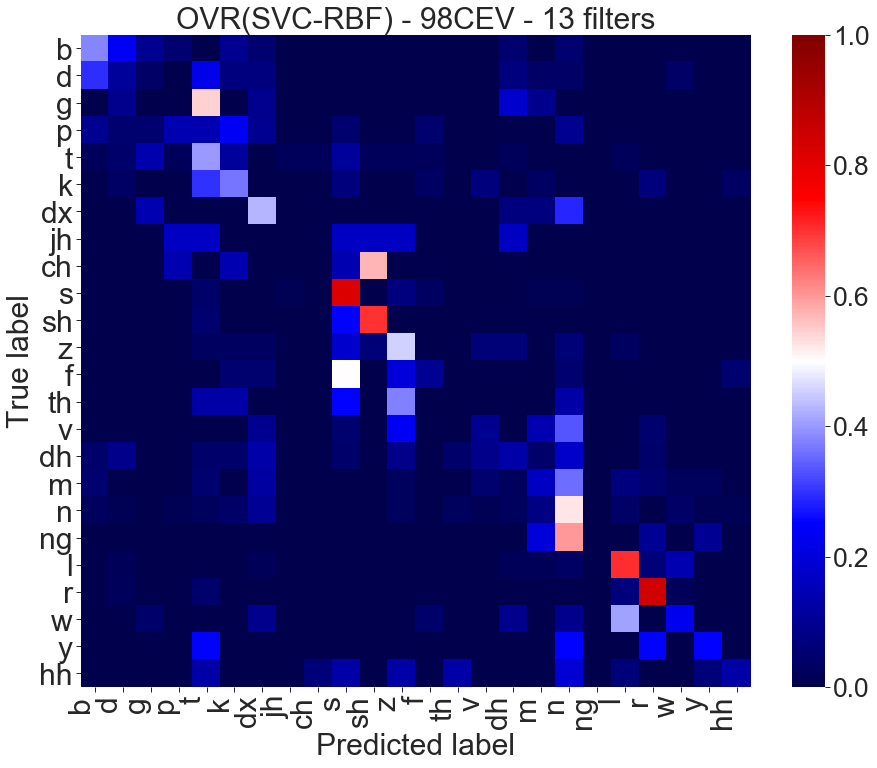

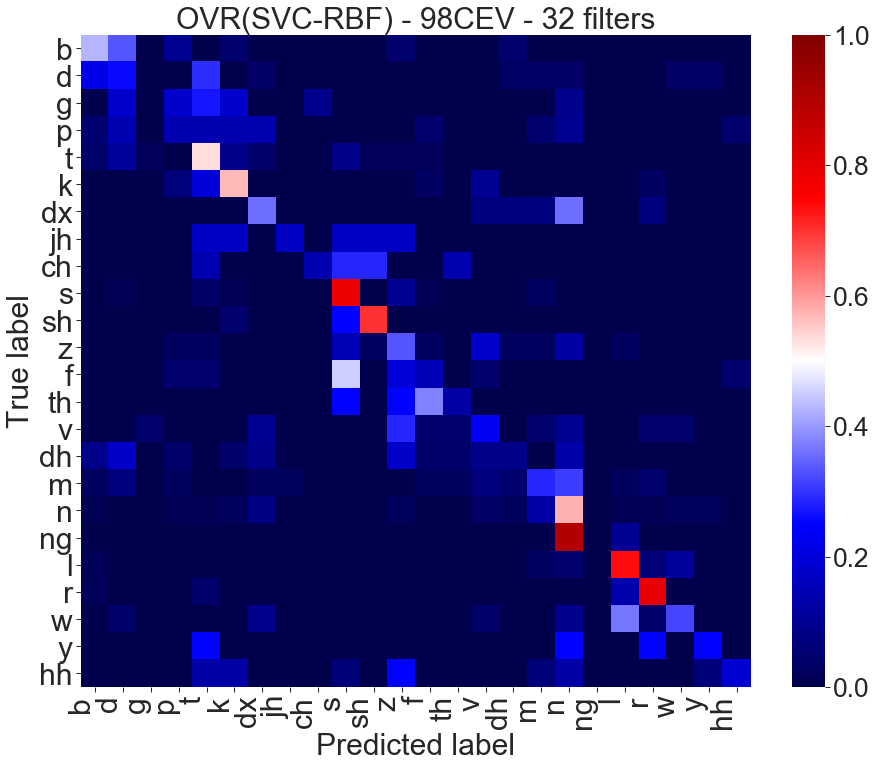

In [30]:
from sklearn.metrics import confusion_matrix

keys = "consonants,nfilters%d,ncepstra%d,seed20,C=10_rbf"

consonants = phd.timit.TIMIT.consonants
class_names = np.asarray(consonants)

nfilters=np.array([5, 13, 32])
ncepstra=np.array([5, 13, 13])

sns.set_context("paper",font_scale=3)

for i in np.arange(len(nfilters)):    
    path, _ = phd.saveFiles.file_path(key=keys%(nfilters[i],ncepstra[i]),
                                      subdir='PCA_SVM-correctGamma=10-2')
    data = phd.saveFiles.read_file(path)
    
    Y_test_binarized = phd.saveFiles.load_dataset(data,'y_labels/y_test_binarized')
    y_test_score = phd.saveFiles.load_dataset(data,'y_score/y_score_test')
    # the 98% of the variance is the last value [-1]
    # para el 95 % es 41, lo he mirado en los datos anteriormente mediante el fichero .pkl
    cm = confusion_matrix(Y_test_binarized.argmax(axis=1),y_test_score[-1].argmax(axis=1))
    fig = phd.plotsTFM.print_confusion_matrix(cm, class_names=class_names, normalize=True, 
                       title='OVR(SVC-RBF) - 98CEV - %d filters'%nfilters[i], cmap="seismic",lw=0, fontsize=30)
    fig.savefig('/Volumes/LeandroLV/TFM/Thesis/Figures/results/CM-RBF-%dFilters-98CEV.svg'%nfilters[i], bbox_inches='tight', format='svg')

## Auditory system conditions (order and relative bandwidth) 

<Figure size 1080x936 with 0 Axes>

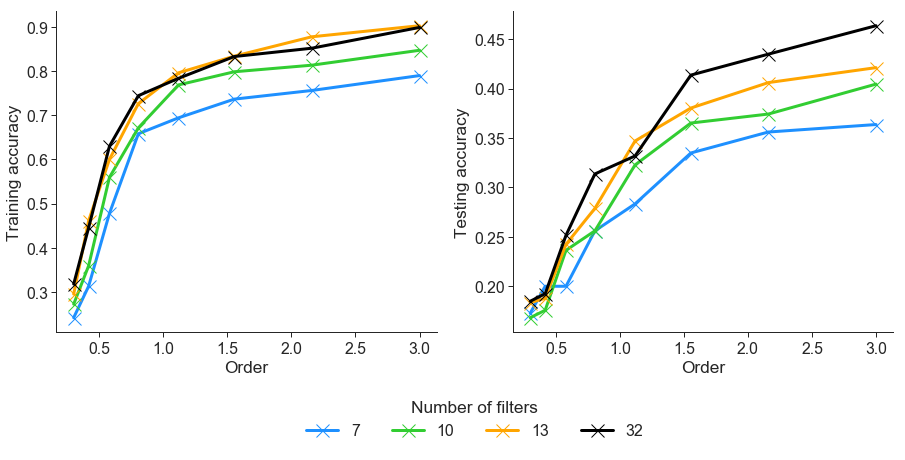

In [7]:
path = "/Volumes/LeandroLV/TFM/results/PCA_SVM-b=%.3f-power=%.3f/consonants,nfilters%d,ncepstra%d,seed20,C=10_gamma=0.01_rbf.pkl"

bw=np.logspace(math.log10(0.1),math.log10(1.019),num=8)
ordr=np.logspace(math.log10(0.3),math.log10(3),num=8)

n_filters_vector = np.array([7, 10, 13, 32], dtype=int)
n_cepstra_vector = np.array([7, 10, 13, 13], dtype=int)

labels = ["7", "10", "13", "32"]

paths = []

for i in range(len(ordr)):
    for j in range(len(n_filters_vector)):
        paths.append(path%(1.019, ordr[i], n_filters_vector[j], n_cepstra_vector[j]))
        
df, train_acc, test_acc, duration, variance, ncomp = sF.read_values(paths)

phd.plots.setup(figsize=(15, 13))
sns.set_style({"axes.spines.right": False})
sns.set_style({"axes.spines.top": False})
sns.set_context("paper",font_scale=1.8, rc={"lines.linewidth": 3})
sns.despine()

fig = plt.figure(); plt.subplot(221); ax1 = plt.gca()

x=ordr
y = np.zeros((len(n_filters_vector),len(ordr)))

k=0
for i in range(len(ordr)):
    for j in range(len(n_filters_vector)):        
        y[j,i] = train_acc[k][-1]
        k=k+1

clrs = ['dodgerblue','limegreen', 'orange', 'black', 'turquoise', 'orchid', 'silver', 'navy']

for i in range(len(n_filters_vector)):
    plt.plot(x,y[i,:],'-x',markersize=13 ,color=clrs[i])        

plt.ylabel('Training accuracy')
plt.xlabel('Order')


plt.subplot(222); ax2 = plt.gca()
y = np.zeros((len(n_filters_vector),len(ordr)))

k=0
for i in range(len(ordr)):
    for j in range(len(n_filters_vector)):        
        y[j,i] = test_acc[k][-1]
        k=k+1

h = [plt.plot(x,y[i,:],'-x',markersize=13, color=clrs[i], label = labels[i])[0] for i in range(len(n_filters_vector))]

plt.ylabel('Testing accuracy')
plt.xlabel('Order')

ncols=4; nlines=4
leg1 = ax2.legend(loc="lower center",bbox_to_anchor=(-0.10, -0.40), handles=h[:nlines//ncols*ncols],
                  ncol=ncols, fancybox=True, title='Number of filters', 
                  shadow=False, frameon=False, prop={'size': 16})
plt.gca().add_artist(leg1)
leg2 = ax2.legend(handles=h[nlines//ncols*ncols:], ncol=nlines-nlines//ncols*ncols)
leg2.remove()

leg1._legend_box._children.append(leg2._legend_handle_box)
leg1._legend_box.stale = True

fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/order_nfilters_Accuracy.svg',
        bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

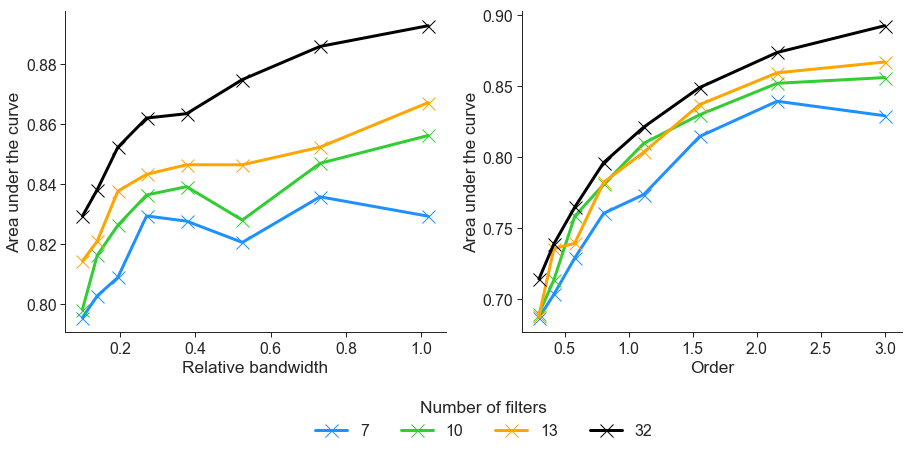

In [5]:
path = "/Volumes/LeandroLV/TFM/results/PCA_SVM-b=%.3f-power=%d/consonants,nfilters%d,ncepstra%d,seed20,C=10_gamma=0.01_rbf.h5"

bw=np.logspace(math.log10(0.1),math.log10(1.019),num=8)
ordr=np.logspace(math.log10(0.3),math.log10(3),num=8)
consonants = phd.timit.TIMIT.consonants
n_filters_vector = np.array([7, 10, 13, 32], dtype=int)
n_cepstra_vector = np.array([7, 10, 13, 13], dtype=int)

labels = ["7", "10", "13", "32"]

paths = []

for i in range(len(bw)):
    for j in range(len(n_filters_vector)):
        paths.append(path%(bw[i], 3, n_filters_vector[j], n_cepstra_vector[j]))
        
phd.plots.setup(figsize=(15, 13))
sns.set_style({"axes.spines.right": False})
sns.set_style({"axes.spines.top": False})
sns.set_context("paper",font_scale=1.8, rc={"lines.linewidth": 3})
sns.despine()

fig = plt.figure(); plt.subplot(221); ax1 = plt.gca()

x= bw
y = np.zeros((len(n_filters_vector),len(ordr)))

k=0

for i in range(len(bw)):
    for j in range(len(n_filters_vector)):
        results=phd.saveFiles.read_file(paths[k]);
        test_binarized = phd.saveFiles.load_dataset\
                        (results, 'y_labels/y_test_binarized')
        test_scores = phd.saveFiles.load_dataset\
                        (results, 'y_score/y_score_test')
        fpr, tpr, roc_auc = methods.ROC_curve\
                            (test_binarized, test_scores[-1], \
                            consonants)
        y[j,i] = roc_auc["micro"]
        k=k+1
        
clrs = ['dodgerblue','limegreen', 'orange', 'black', 'turquoise', 'orchid', 'silver', 'navy']

for i in range(len(n_filters_vector)):
    plt.plot(x,y[i,:],'-x',markersize=13 ,color=clrs[i])
    
plt.ylabel('Area under the curve')
plt.xlabel('Relative bandwidth')


plt.subplot(222); ax2 = plt.gca()
path = []
path = "/Volumes/LeandroLV/TFM/results/PCA_SVM-b=%.3f-power=%.3f/consonants,nfilters%d,ncepstra%d,seed20,C=10_gamma=0.01_rbf.h5"
paths = []

for i in range(len(ordr)):
    for j in range(len(n_filters_vector)):
        paths.append(path%(1.019, ordr[i], n_filters_vector[j], n_cepstra_vector[j]))

x = ordr        
y = np.zeros((len(n_filters_vector),len(ordr)))

k=0

for i in range(len(ordr)):
    for j in range(len(n_filters_vector)):
        results=phd.saveFiles.read_file(paths[k]);
        test_binarized = phd.saveFiles.load_dataset\
                        (results, 'y_labels/y_test_binarized')
        test_scores = phd.saveFiles.load_dataset\
                        (results, 'y_score/y_score_test')
        fpr, tpr, roc_auc = methods.ROC_curve\
                            (test_binarized, test_scores[-1], \
                            consonants)
        y[j,i] = roc_auc["micro"]
        k=k+1
            
h = [plt.plot(x,y[i,:],'-x',markersize=13, color=clrs[i], label = labels[i])[0] for i in range(len(n_filters_vector))]
    
plt.ylabel('Area under the curve')
plt.xlabel('Order')

ncols=4; nlines=4
leg1 = ax2.legend(loc="lower center",bbox_to_anchor=(-0.10, -0.40), handles=h[:nlines//ncols*ncols],
                  ncol=ncols, fancybox=True, title='Number of filters', 
                  shadow=False, frameon=False, prop={'size': 16})
plt.gca().add_artist(leg1)
leg2 = ax2.legend(handles=h[nlines//ncols*ncols:], ncol=nlines-nlines//ncols*ncols)
leg2.remove()

leg1._legend_box._children.append(leg2._legend_handle_box)
leg1._legend_box.stale = True

fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/ROC_curves_relB_order.svg',
        bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

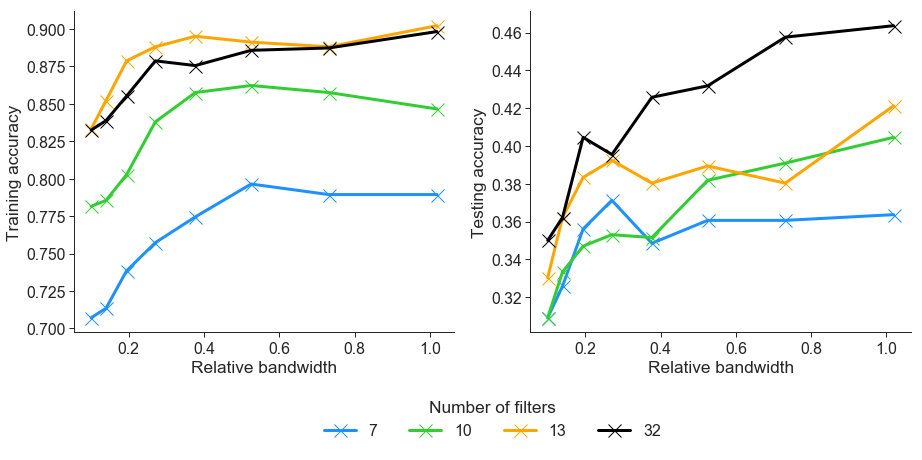

In [77]:
path = "/Volumes/LeandroLV/TFM/results/PCA_SVM-b=%.3f-power=%d/consonants,nfilters%d,ncepstra%d,seed20,C=10_gamma=0.01_rbf.pkl"

bw=np.logspace(math.log10(0.1),math.log10(1.019),num=8)
ordr=np.logspace(math.log10(0.3),math.log10(3),num=8)

n_filters_vector = np.array([7, 10, 13, 32], dtype=int)
n_cepstra_vector = np.array([7, 10, 13, 13], dtype=int)

labels = ["7", "10", "13", "32"]

paths = []

for i in range(len(bw)):
    for j in range(len(n_filters_vector)):
        paths.append(path%(bw[i], 3, n_filters_vector[j], n_cepstra_vector[j]))

df, train_acc, test_acc, duration, variance, ncomp = sF.read_values(paths)

phd.plots.setup(figsize=(15, 13))
sns.set_style({"axes.spines.right": False})
sns.set_style({"axes.spines.top": False})
sns.set_context("paper",font_scale=1.8, rc={"lines.linewidth": 3})
sns.despine()

fig = plt.figure(); plt.subplot(221); ax1 = plt.gca()

x= bw
y = np.zeros((len(n_filters_vector),len(ordr)))

k=0
for i in range(len(bw)):
    for j in range(len(n_filters_vector)):        
        y[j,i] = train_acc[k][-1]
        k=k+1

clrs = ['dodgerblue','limegreen', 'orange', 'black', 'turquoise', 'orchid', 'silver', 'navy']

for i in range(len(n_filters_vector)):
    plt.plot(x,y[i,:],'-x',markersize=13 ,color=clrs[i])        

plt.ylabel('Training accuracy')
plt.xlabel('Relative bandwidth')


plt.subplot(222); ax2 = plt.gca()
y = np.zeros((len(n_filters_vector),len(ordr)))

k=0
for i in range(len(bw)):
    for j in range(len(n_filters_vector)):        
        y[j,i] = test_acc[k][-1]
        k=k+1

h = [plt.plot(x,y[i,:],'-x',markersize=13, color=clrs[i], label = labels[i])[0] for i in range(len(n_filters_vector))]

plt.ylabel('Testing accuracy')
plt.xlabel('Relative bandwidth')

ncols=4; nlines=4
leg1 = ax2.legend(loc="lower center",bbox_to_anchor=(-0.10, -0.40), handles=h[:nlines//ncols*ncols],
                  ncol=ncols, fancybox=True, title='Number of filters', 
                  shadow=False, frameon=False, prop={'size': 16})
plt.gca().add_artist(leg1)
leg2 = ax2.legend(handles=h[nlines//ncols*ncols:], ncol=nlines-nlines//ncols*ncols)
leg2.remove()

leg1._legend_box._children.append(leg2._legend_handle_box)
leg1._legend_box.stale = True

fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/bw_nfilters_Accuracy.svg',
        bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

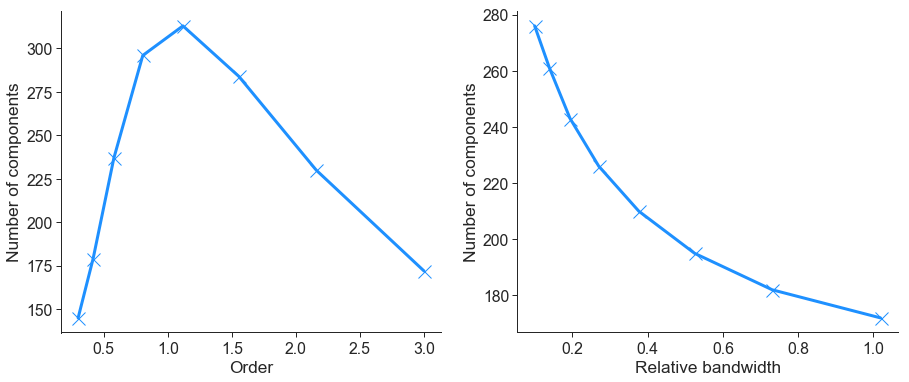

In [6]:
name = "/Volumes/LeandroLV/TFM/results/PCA_SVM-b=1.019-power=%.3f/consonants,nfilters32,ncepstra13,seed20,C=10_gamma=0.01_rbf.pkl"
power = np.array([0.300, 0.417, 0.579, 0.805, 1.118, 1.554, 2.159, 3.000])
path = []

for i in power:
    path.append(name%(i))

df, train_acc, test_acc, duration, variance, ncomp = sF.read_values(path)

phd.plots.setup(figsize=(15, 13))
sns.set_style({"axes.spines.right": False})
sns.set_style({"axes.spines.top": False})
sns.set_context("paper",font_scale=1.8, rc={"lines.linewidth": 3})
sns.despine()

fig = plt.figure(); plt.subplot(221); ax1 = plt.gca()

x=np.logspace(math.log10(0.3),math.log10(3),num=8)
y = np.zeros(len(df))

for i in range(len(df)):
    y[i] = ncomp[i][-1]
    
plt.plot(x,y,'-x',markersize=13 ,color='dodgerblue')
plt.ylabel('Number of components')
plt.xlabel('Order')


name = "/Volumes/LeandroLV/TFM/results/PCA_SVM-b=%.3f-power=3/consonants,nfilters32,ncepstra13,seed20,C=10_gamma=0.01_rbf.pkl"         
bw = np.array([0.100, 0.139, 0.194, 0.270, 0.377, 0.525, 0.731, 1.019])        
path = []

for i in bw:
    path.append(name%(i))
    
df, train_acc, test_acc, duration, variance, ncomp = sF.read_values(path)

plt.subplot(222); ax1 = plt.gca()
x = np.logspace(math.log10(0.1),math.log10(1.019),num=8)
y = np.zeros(len(df))
for i in range(len(df)):
    y[i] = ncomp[i][-1]
    
plt.plot(x,y,'-x',markersize=13 ,color='dodgerblue')

plt.ylabel('Number of components')
plt.xlabel('Relative bandwidth')

fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/order_relbandwidth_ncomp.svg',
        bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

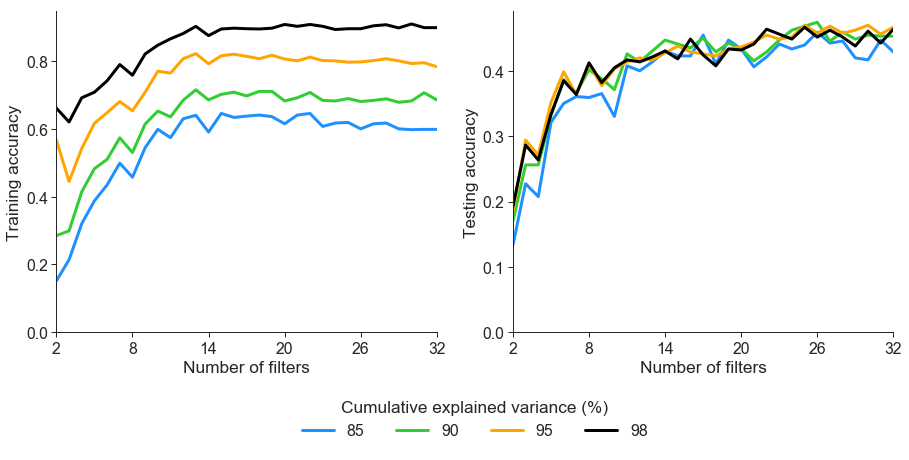

In [17]:
path = sorted(glob.glob("/Volumes/LeandroLV/TFM/results/PCA_SVM-b=1.019-power=3.000/*.pkl"), key=os.path.getmtime)

df, train_acc, test_acc, duration, variance, ncomp = sF.read_values(path)

phd.plots.setup(figsize=(15,13))
sns.set_style({"axes.spines.right": False})
sns.set_style({"axes.spines.top": False})
sns.set_context("paper",font_scale=1.8, rc={"lines.linewidth": 3})
sns.despine()

clrs = ['dodgerblue','limegreen', 'orange', 'black', 'turquoise', 'orchid', 'silver', 'navy']
var = [0.85, 0.90, 0.95, 0.98]
labels = ["85", "90", "95", "98"]


fig = plt.figure(); plt.subplot(221); ax1 = plt.gca()

x = np.arange(31, dtype=int)+2
y = np.zeros([len(var),len(x)])

for i in range(len(var)):
    for j in range(len(x)):
        _, index = phd.methodsTFM.find_nearest_forPCA(variance[j], var[i])
        y[i, j] = train_acc[j][index]

h = [plt.plot(x,y[i,:],color=clrs[i], label = labels[i])[0] for i in range(len(var))]

plt.ylabel('Training accuracy'); plt.xlabel('Number of filters'); plt.ylim(0)
ax1.set_xticks(np.linspace(2,32,6, dtype=int)); ax1.set_xticklabels(np.linspace(2,32,6, dtype=int))
plt.xlim(2,32)

plt.subplot(222); ax2 = plt.gca()

y = np.zeros([len(var),len(x)])
for i in range(len(var)):
    for j in range(len(x)):
        _, index = phd.methodsTFM.find_nearest_forPCA(variance[j], var[i])
        y[i, j] = test_acc[j][index]

h = [plt.plot(x,y[i,:],color=clrs[i], label = labels[i])[0] for i in range(len(var))]

plt.ylabel('Testing accuracy'); plt.xlabel('Number of filters'); plt.ylim(0)
ax2.set_xticks(np.linspace(2,32,6, dtype=int)); ax1.set_xticklabels(np.linspace(2,32,6, dtype=int))
plt.xlim(2,32)

ncols=4; nlines=4
leg1 = ax2.legend(loc="lower center",bbox_to_anchor=(-0.10, -0.40), handles=h[:nlines//ncols*ncols],
                  ncol=ncols, fancybox=True, title='Cumulative explained variance (%)', 
                  shadow=False, frameon=False, prop={'size': 16})
plt.gca().add_artist(leg1)
leg2 = ax2.legend(handles=h[nlines//ncols*ncols:], ncol=nlines-nlines//ncols*ncols)
leg2.remove()

leg1._legend_box._children.append(leg2._legend_handle_box)
leg1._legend_box.stale = True
    
fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/nfilters_acc_CEV-V2.svg',
        bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

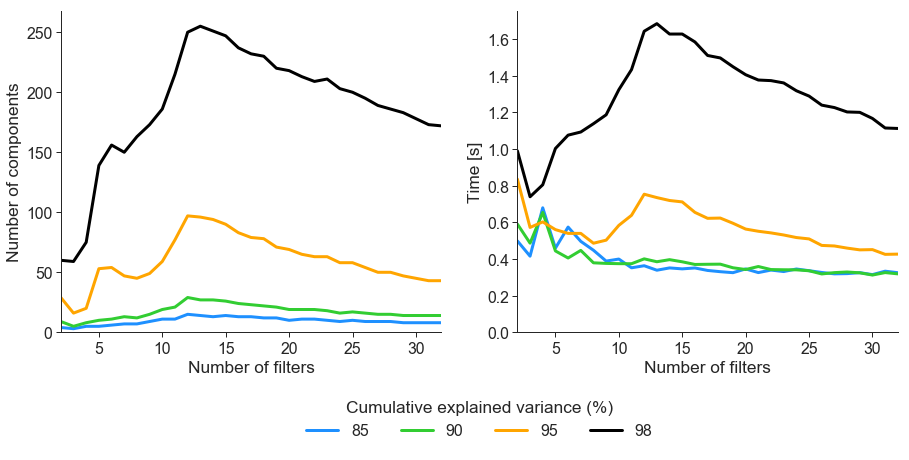

In [7]:
path = sorted(glob.glob("/Volumes/LeandroLV/TFM/results/PCA_SVM-b=1.019-power=3.000/*.pkl"), key=os.path.getmtime)

df, train_acc, test_acc, duration, variance, ncomp = sF.read_values(path)

phd.plots.setup(figsize=(15,13))
sns.set_style({"axes.spines.right": False})
sns.set_style({"axes.spines.top": False})
sns.set_context("paper",font_scale=1.8, rc={"lines.linewidth": 3})
sns.despine()

clrs = ['dodgerblue','limegreen', 'orange', 'black', 'turquoise', 'orchid', 'silver', 'navy']
var = [0.85, 0.90, 0.95, 0.98]
labels = ["85", "90", "95", "98"]


fig = plt.figure(); plt.subplot(221); ax2 = plt.gca()

x = np.arange(31, dtype=int)+2
y = np.zeros([len(var),len(df)])

for i in range(len(var)):
    for j in range(len(df)):
        _, index = phd.methodsTFM.find_nearest_forPCA(variance[j], var[i])
        y[i, j] = ncomp[j][index]

h = [plt.plot(x,y[i,:],color=clrs[i], label = labels[i])[0] for i in range(len(var))]

plt.ylabel('Number of components'); plt.xlabel('Number of filters'); plt.ylim(0)
ax1.set_xticks(np.linspace(2,32,6, dtype=int)); ax1.set_xticklabels(np.linspace(2,32,6, dtype=int))
plt.xlim(2,32)

plt.subplot(222); ax2 = plt.gca()

y = np.zeros([len(var),len(df)])
for i in range(len(var)):
    for j in range(len(df)):
        _, index = phd.methodsTFM.find_nearest_forPCA(variance[j], var[i])
        y[i, j] = duration[j][index]

h = [plt.plot(x,y[i,:],color=clrs[i], label = labels[i])[0] for i in range(len(var))]

plt.ylabel('Time [s]'); plt.xlabel('Number of filters'); plt.ylim(0)
ax1.set_xticks(np.linspace(2,32,6, dtype=int)); ax1.set_xticklabels(np.linspace(2,32,6, dtype=int))
plt.xlim(2,32)

ncols=4; nlines=4
leg1 = ax2.legend(loc="lower center",bbox_to_anchor=(-0.10, -0.40), handles=h[:nlines//ncols*ncols],
                  ncol=ncols, fancybox=True, title='Cumulative explained variance (%)', 
                  shadow=False, frameon=False, prop={'size': 16})
plt.gca().add_artist(leg1)
leg2 = ax2.legend(handles=h[nlines//ncols*ncols:], ncol=nlines-nlines//ncols*ncols)
leg2.remove()

leg1._legend_box._children.append(leg2._legend_handle_box)
leg1._legend_box.stale = True
    
fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/nfilters_ncomp_time.svg',
        bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

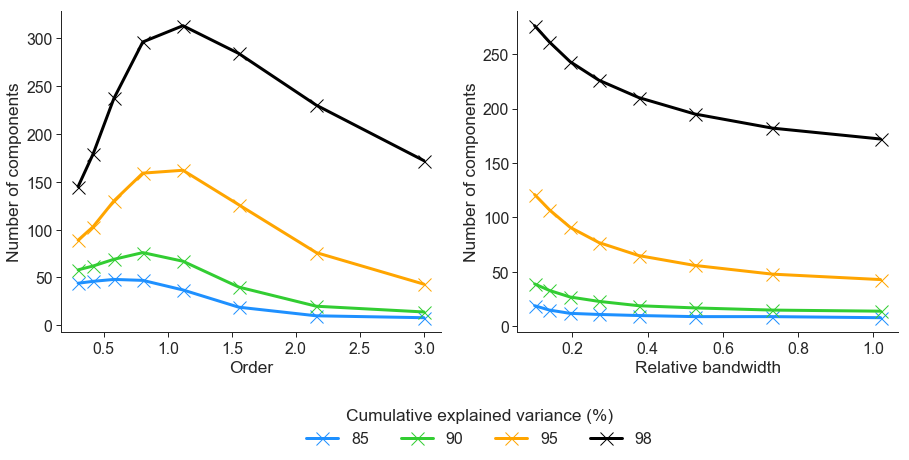

In [10]:
name = "/Volumes/LeandroLV/TFM/results/PCA_SVM-b=1.019-power=%.3f/consonants,nfilters32,ncepstra13,seed20,C=10_gamma=0.01_rbf.pkl"
power = np.array([0.300, 0.417, 0.579, 0.805, 1.118, 1.554, 2.159, 3.000])
path = []

for i in power:
    path.append(name%(i))

df, train_acc, test_acc, duration, variance, ncomp = sF.read_values(path)

phd.plots.setup(figsize=(15, 13))
sns.set_style({"axes.spines.right": False})
sns.set_style({"axes.spines.top": False})
sns.set_context("paper",font_scale=1.8, rc={"lines.linewidth": 3})
sns.despine()

clrs = ['dodgerblue','limegreen', 'orange', 'black', 'turquoise', 'orchid', 'silver', 'navy']
var = [0.85, 0.90, 0.95, 0.98]
labels = ["85", "90", "95", "98"]


fig = plt.figure(); plt.subplot(221); ax1 = plt.gca()

x=np.logspace(math.log10(0.3),math.log10(3),num=8)
y = np.zeros([len(var),len(df)])

for i in range(len(var)):
    for j in range(len(df)):
        _, index = phd.methodsTFM.find_nearest_forPCA(variance[j], var[i])
        y[i, j] = ncomp[j][index]
    plt.plot(x,y[i,:], '-x',markersize=13 ,color=clrs[i])

plt.ylabel('Number of components')
plt.xlabel('Order')


name = "/Volumes/LeandroLV/TFM/results/PCA_SVM-b=%.3f-power=3/consonants,nfilters32,ncepstra13,seed20,C=10_gamma=0.01_rbf.pkl"         
bw = np.array([0.100, 0.139, 0.194, 0.270, 0.377, 0.525, 0.731, 1.019])        
path = []

for i in bw:
    path.append(name%(i))
    
df, train_acc, test_acc, duration, variance, ncomp = sF.read_values(path)

plt.subplot(222); ax2 = plt.gca()
x = np.logspace(math.log10(0.1),math.log10(1.019),num=8)
y = np.zeros([len(var),len(df)])

for i in range(len(var)):
    for j in range(len(df)):
        _, index = phd.methodsTFM.find_nearest_forPCA(variance[j], var[i])
        y[i, j] = ncomp[j][index]
    plt.plot(x,y[i,:], '-x',markersize=13 ,color=clrs[i], label = labels[i])


plt.ylabel('Number of components')
plt.xlabel('Relative bandwidth')
ax2.legend(bbox_to_anchor=(-0.10, -0.40), ncol=4, loc="lower center",
           fancybox=True, title='Cumulative explained variance (%)', shadow=False, frameon=False, prop={'size': 16})

fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/order_relbandwidth_ncomp.svg',
        bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

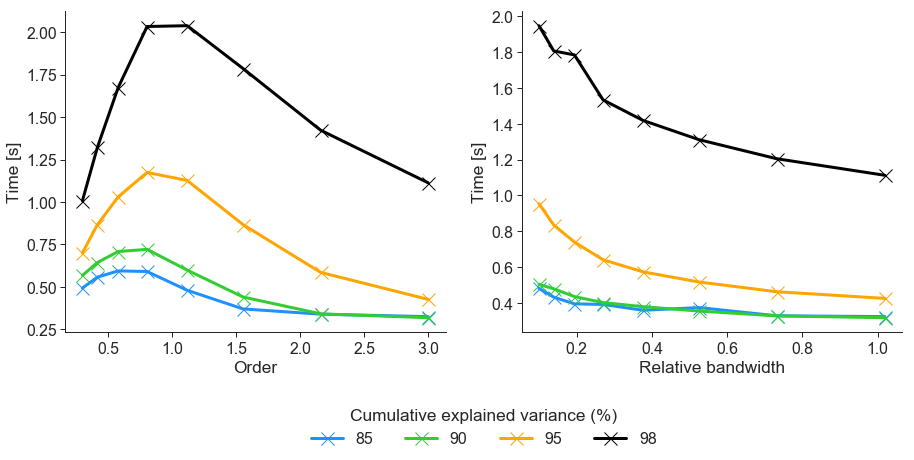

In [15]:
name = "/Volumes/LeandroLV/TFM/results/PCA_SVM-b=%.3f-power=3/consonants,nfilters32,ncepstra13,seed20,C=10_gamma=0.01_rbf.pkl"         
bw = np.array([0.100, 0.139, 0.194, 0.270, 0.377, 0.525, 0.731, 1.019])        
path_bw = []

for i in bw:
    path_bw.append(name%(i))
    
name = "/Volumes/LeandroLV/TFM/results/PCA_SVM-b=1.019-power=%.3f/consonants,nfilters32,ncepstra13,seed20,C=10_gamma=0.01_rbf.pkl"
power = np.array([0.300, 0.417, 0.579, 0.805, 1.118, 1.554, 2.159, 3.000])
path_pw = []

for i in power:
    path_pw.append(name%(i))    
    

df, train_acc, test_acc, duration, variance, ncomp = sF.read_values(path_pw)

phd.plots.setup(figsize=(15, 13))
sns.set_style({"axes.spines.right": False})
sns.set_style({"axes.spines.top": False})
sns.set_context("paper",font_scale=1.8, rc={"lines.linewidth": 3})
sns.despine()

clrs = ['dodgerblue','limegreen', 'orange', 'black', 'turquoise', 'orchid', 'silver', 'navy']
var = [0.85, 0.90, 0.95, 0.98]
labels = ["85", "90", "95", "98"]


fig = plt.figure(); plt.subplot(221); ax1 = plt.gca()

x=np.logspace(math.log10(0.3),math.log10(3),num=8)
y = np.zeros([len(var),len(df)])

for i in range(len(var)):
    for j in range(len(df)):
        _, index = phd.methodsTFM.find_nearest_forPCA(variance[j], var[i])
        y[i, j] = duration[j][index]
    plt.plot(x,y[i,:], '-x',markersize=13 ,color=clrs[i])

plt.ylabel('Time [s]')
plt.xlabel('Order')


df, train_acc, test_acc, duration, variance, ncomp = sF.read_values(path_bw)

plt.subplot(222); ax2 = plt.gca()
x = np.logspace(math.log10(0.1),math.log10(1.019),num=8)
y = np.zeros([len(var),len(df)])

for i in range(len(var)):
    for j in range(len(df)):
        _, index = phd.methodsTFM.find_nearest_forPCA(variance[j], var[i])
        y[i, j] = duration[j][index]
    plt.plot(x,y[i,:], '-x',markersize=13 ,color=clrs[i], label = labels[i])


plt.ylabel('Time [s]')
plt.xlabel('Relative bandwidth')
ax2.legend(bbox_to_anchor=(-0.10, -0.40), ncol=4, loc="lower center",
           fancybox=True, title='Cumulative explained variance (%)', shadow=False, frameon=False, prop={'size': 16})

fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/order_relbandwidth_time.svg',
        bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

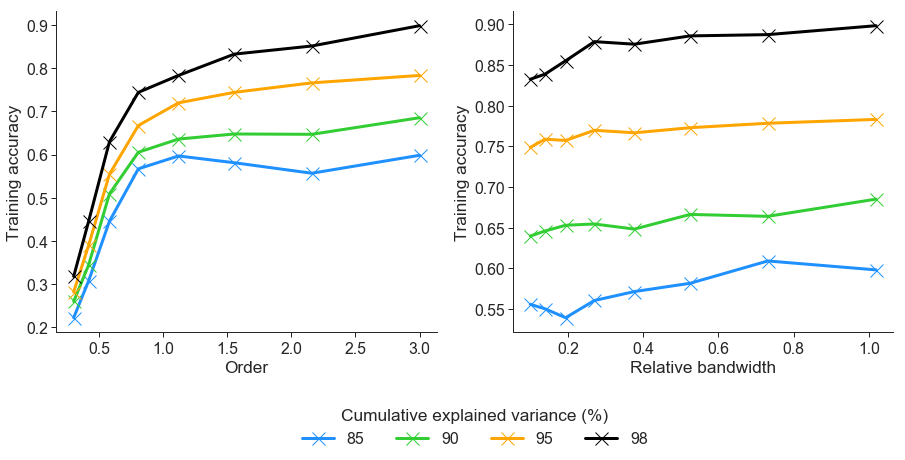

In [16]:
df, train_acc, test_acc, duration, variance, ncomp = sF.read_values(path_pw)

phd.plots.setup(figsize=(15, 13))
sns.set_style({"axes.spines.right": False})
sns.set_style({"axes.spines.top": False})
sns.set_context("paper",font_scale=1.8, rc={"lines.linewidth": 3})
sns.despine()

clrs = ['dodgerblue','limegreen', 'orange', 'black', 'turquoise', 'orchid', 'silver', 'navy']
var = [0.85, 0.90, 0.95, 0.98]
labels = ["85", "90", "95", "98"]


fig = plt.figure(); plt.subplot(221); ax1 = plt.gca()

x=np.logspace(math.log10(0.3),math.log10(3),num=8)
y = np.zeros([len(var),len(df)])

for i in range(len(var)):
    for j in range(len(df)):
        _, index = phd.methodsTFM.find_nearest_forPCA(variance[j], var[i])
        y[i, j] = train_acc[j][index]
    plt.plot(x,y[i,:], '-x',markersize=13 ,color=clrs[i])

plt.ylabel('Training accuracy')
plt.xlabel('Order')


df, train_acc, test_acc, duration, variance, ncomp = sF.read_values(path_bw)

plt.subplot(222); ax2 = plt.gca()
x = np.logspace(math.log10(0.1),math.log10(1.019),num=8)
y = np.zeros([len(var),len(df)])

for i in range(len(var)):
    for j in range(len(df)):
        _, index = phd.methodsTFM.find_nearest_forPCA(variance[j], var[i])
        y[i, j] = train_acc[j][index]
    plt.plot(x,y[i,:], '-x',markersize=13 ,color=clrs[i], label = labels[i])


plt.ylabel('Training accuracy')
plt.xlabel('Relative bandwidth')
ax2.legend(bbox_to_anchor=(-0.10, -0.40), ncol=4, loc="lower center",
           fancybox=True, title='Cumulative explained variance (%)', shadow=False, frameon=False, prop={'size': 16})

fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/order_relbandwidth_TRAINACC.svg',
        bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

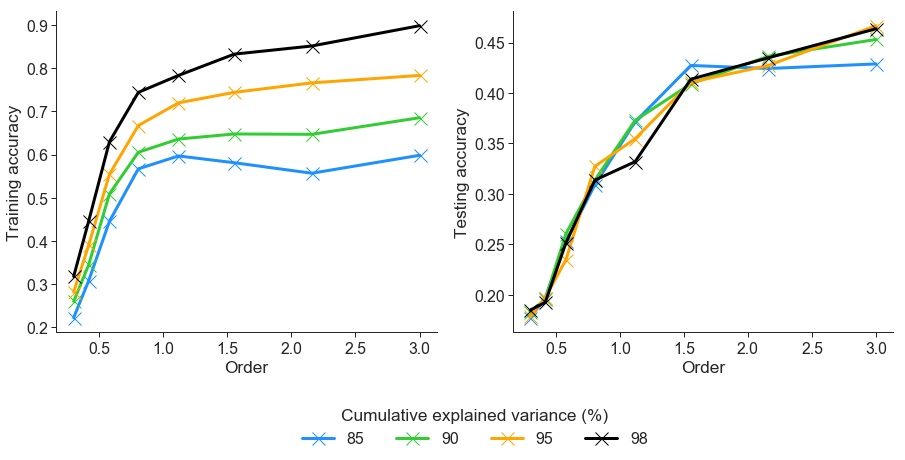

In [17]:
df, train_acc, test_acc, duration, variance, ncomp = sF.read_values(path_pw)

phd.plots.setup(figsize=(15, 13))
sns.set_style({"axes.spines.right": False})
sns.set_style({"axes.spines.top": False})
sns.set_context("paper",font_scale=1.8, rc={"lines.linewidth": 3})
sns.despine()

clrs = ['dodgerblue','limegreen', 'orange', 'black', 'turquoise', 'orchid', 'silver', 'navy']
var = [0.85, 0.90, 0.95, 0.98]
labels = ["85", "90", "95", "98"]


fig = plt.figure(); plt.subplot(221); ax1 = plt.gca()

x=np.logspace(math.log10(0.3),math.log10(3),num=8)
y = np.zeros([len(var),len(df)])

for i in range(len(var)):
    for j in range(len(df)):
        _, index = phd.methodsTFM.find_nearest_forPCA(variance[j], var[i])
        y[i, j] = train_acc[j][index]
    plt.plot(x,y[i,:], '-x',markersize=13 ,color=clrs[i])

plt.ylabel('Training accuracy')
plt.xlabel('Order')


plt.subplot(222); ax2 = plt.gca()
y = np.zeros([len(var),len(df)])

for i in range(len(var)):
    for j in range(len(df)):
        _, index = phd.methodsTFM.find_nearest_forPCA(variance[j], var[i])
        y[i, j] = test_acc[j][index]
    plt.plot(x,y[i,:], '-x',markersize=13 ,color=clrs[i], label = labels[i])


plt.ylabel('Testing accuracy')
plt.xlabel('Order')
ax2.legend(bbox_to_anchor=(-0.10, -0.40), ncol=4, loc="lower center",
           fancybox=True, title='Cumulative explained variance (%)', shadow=False, frameon=False, prop={'size': 16})

fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/order_train_test_acc.svg',
        bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

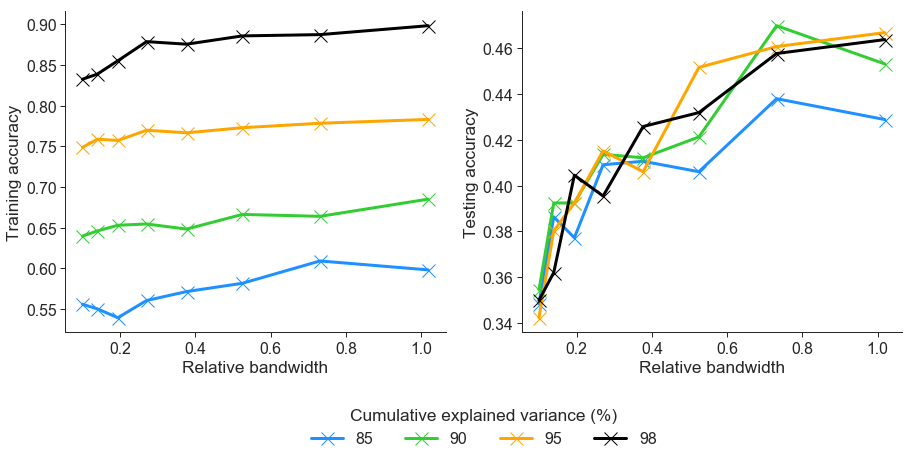

In [18]:
df, train_acc, test_acc, duration, variance, ncomp = sF.read_values(path_bw)

phd.plots.setup(figsize=(15, 13))
sns.set_style({"axes.spines.right": False})
sns.set_style({"axes.spines.top": False})
sns.set_context("paper",font_scale=1.8, rc={"lines.linewidth": 3})
sns.despine()

clrs = ['dodgerblue','limegreen', 'orange', 'black', 'turquoise', 'orchid', 'silver', 'navy']
var = [0.85, 0.90, 0.95, 0.98]
labels = ["85", "90", "95", "98"]


fig = plt.figure(); plt.subplot(221); ax1 = plt.gca()

x = np.logspace(math.log10(0.1),math.log10(1.019),num=8)
y = np.zeros([len(var),len(df)])

for i in range(len(var)):
    for j in range(len(df)):
        _, index = phd.methodsTFM.find_nearest_forPCA(variance[j], var[i])
        y[i, j] = train_acc[j][index]
    plt.plot(x,y[i,:], '-x',markersize=13 ,color=clrs[i])

plt.ylabel('Training accuracy')
plt.xlabel('Relative bandwidth')

plt.subplot(222); ax2 = plt.gca()

y = np.zeros([len(var),len(df)])

for i in range(len(var)):
    for j in range(len(df)):
        _, index = phd.methodsTFM.find_nearest_forPCA(variance[j], var[i])
        y[i, j] = test_acc[j][index]
    plt.plot(x,y[i,:], '-x',markersize=13 ,color=clrs[i], label = labels[i])


plt.ylabel('Testing accuracy')
plt.xlabel('Relative bandwidth')
ax2.legend(bbox_to_anchor=(-0.10, -0.40), ncol=4, loc="lower center",
           fancybox=True, title='Cumulative explained variance (%)', shadow=False, frameon=False, prop={'size': 16})

fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/relbandiwdth_train_test_acc.svg',
        bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

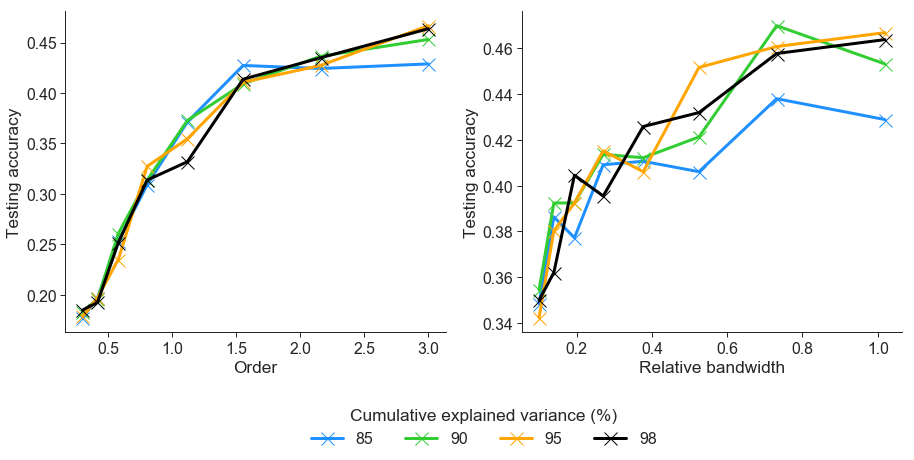

In [19]:
df, train_acc, test_acc, duration, variance, ncomp = sF.read_values(path_pw)

phd.plots.setup(figsize=(15, 13))
sns.set_style({"axes.spines.right": False})
sns.set_style({"axes.spines.top": False})
sns.set_context("paper",font_scale=1.8, rc={"lines.linewidth": 3})
sns.despine()

clrs = ['dodgerblue','limegreen', 'orange', 'black', 'turquoise', 'orchid', 'silver', 'navy']
var = [0.85, 0.90, 0.95, 0.98]
labels = ["85", "90", "95", "98"]


fig = plt.figure(); plt.subplot(221); ax1 = plt.gca()

x=np.logspace(math.log10(0.3),math.log10(3),num=8)
y = np.zeros([len(var),len(df)])

for i in range(len(var)):
    for j in range(len(df)):
        _, index = phd.methodsTFM.find_nearest_forPCA(variance[j], var[i])
        y[i, j] = test_acc[j][index]
    plt.plot(x,y[i,:], '-x',markersize=13 ,color=clrs[i])

plt.ylabel('Testing accuracy')
plt.xlabel('Order')


df, train_acc, test_acc, duration, variance, ncomp = sF.read_values(path_bw)

plt.subplot(222); ax2 = plt.gca()
x = np.logspace(math.log10(0.1),math.log10(1.019),num=8)
y = np.zeros([len(var),len(df)])

for i in range(len(var)):
    for j in range(len(df)):
        _, index = phd.methodsTFM.find_nearest_forPCA(variance[j], var[i])
        y[i, j] = test_acc[j][index]
    plt.plot(x,y[i,:], '-x',markersize=13 ,color=clrs[i], label = labels[i])


plt.ylabel('Testing accuracy')
plt.xlabel('Relative bandwidth')
ax2.legend(bbox_to_anchor=(-0.10, -0.40), ncol=4, loc="lower center",
           fancybox=True, title='Cumulative explained variance (%)', shadow=False, frameon=False, prop={'size': 16})

fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/order_relbandwidth_TESTINGACC.svg',
        bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

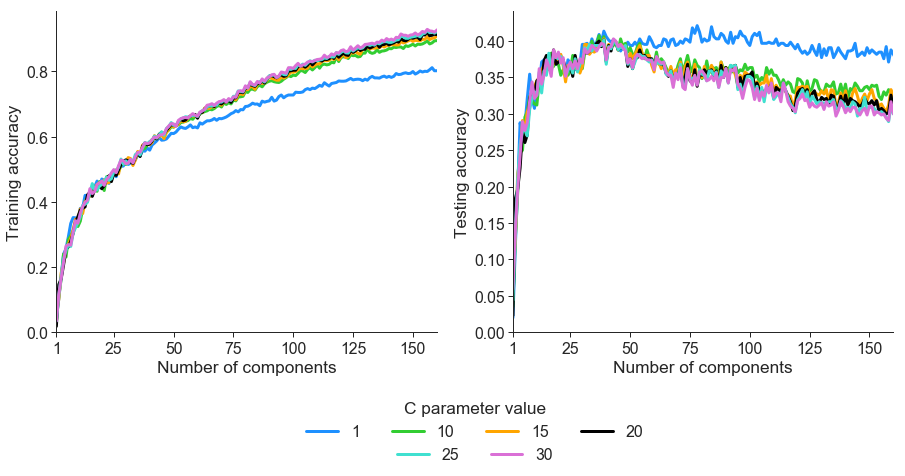

In [22]:
path = ["/Volumes/LeandroLV/TFM/results/draft/PCA_SVM/consonants,seed20,C=1_linear.pkl",         
        "/Volumes/LeandroLV/TFM/results/draft/PCA_SVM/consonants,seed20,C=10_linear.pkl",         
        "/Volumes/LeandroLV/TFM/results/draft/PCA_SVM/consonants,seed20,C=15_linear.pkl",
        "/Volumes/LeandroLV/TFM/results/draft/PCA_SVM/consonants,seed20,C=20_linear.pkl",
        "/Volumes/LeandroLV/TFM/results/draft/PCA_SVM/consonants,seed20,C=25_linear.pkl",
        "/Volumes/LeandroLV/TFM/results/draft/PCA_SVM/consonants,seed20,C=30_linear.pkl"]

labels=["1", "10","15", "20", "25", "30"];
fig = phd.plotsTFM.plot_acc_ncomp(path, labels, xlimupper=160 , legtitle="C parameter value")
fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/linearKernel-consonants.svg',
             bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

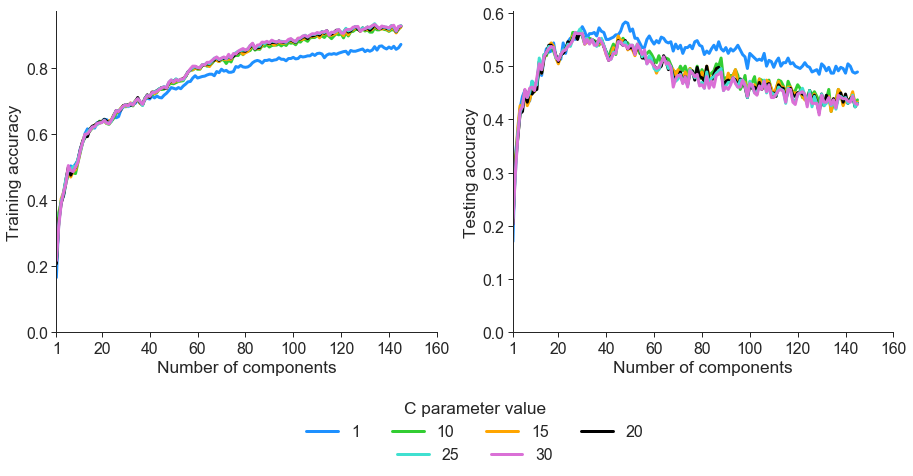

In [23]:
path = ["/Volumes/LeandroLV/TFM/results/draft/PCA_SVM/vowels,seed20,C=1_linear.pkl",         
        "/Volumes/LeandroLV/TFM/results/draft/PCA_SVM/vowels,seed20,C=10_linear.pkl",         
        "/Volumes/LeandroLV/TFM/results/draft/PCA_SVM/vowels,seed20,C=15_linear.pkl",
        "/Volumes/LeandroLV/TFM/results/draft/PCA_SVM/vowels,seed20,C=20_linear.pkl",
        "/Volumes/LeandroLV/TFM/results/draft/PCA_SVM/vowels,seed20,C=25_linear.pkl",
        "/Volumes/LeandroLV/TFM/results/draft/PCA_SVM/vowels,seed20,C=30_linear.pkl"]

labels=["1", "10","15", "20", "25", "30"];
fig = phd.plotsTFM.plot_acc_ncomp(path, labels, xlimupper=160 , legtitle="C parameter value")
fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/linearKernel-vowels.svg',
             bbox_inches='tight', format='svg')

<Figure size 1080x936 with 0 Axes>

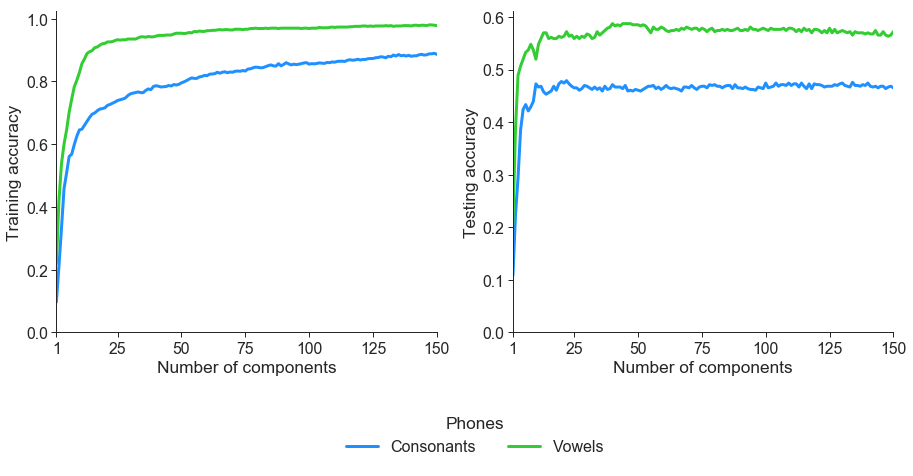

In [27]:
path = ["/Volumes/LeandroLV/TFM/results/PCA_SVM-b=1.019-power=3.000/consonants,nfilters32,ncepstra13,seed20,C=10_gamma=0.01_rbf.pkl",
        "/Volumes/LeandroLV/TFM/results/PCA_SVM-b=1.019-power=3.000/vowels,nfilters32,ncepstra13,seed20,C=10_gamma=0.01_rbf.pkl"]
fig = phd.plotsTFM.plot_acc_ncomp(path, labels=["Consonants", "Vowels"], legtitle="Phones", xlimupper=150)
fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/RBF-kernel-Consonants-Vowels.svg',
            bbox_inches='tight', format='svg')

The file consonants,nfilters32,ncepstra13,seed20.h5 has the next items:
data_ncc
data_ncc/test
data_ncc/train
y_labels
y_labels/y_test_binarized
y_labels/y_train_binarized
('X_train size: ', (1277, 2795))
('Y_train size: ', (1277,))
('Y_test size: ', (660, 2795))
('X_test size: ', (660,))
('Full dataset: ', (1937, 2795))
('Full labels: ', (1937,))


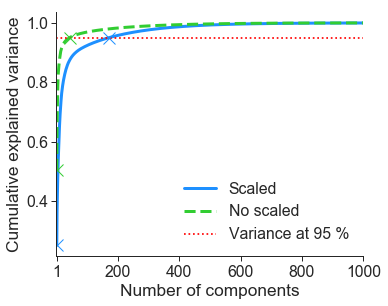

In [34]:
phd.plots.setup(figsize=(5.5,4.5))
sns.set_style({"axes.spines.right": False})
sns.set_style({"axes.spines.top": False})
sns.set_context("paper",font_scale=1.8, rc={"lines.linewidth": 3})
sns.despine()

X, Y, Y_train_binarized, Y_test_binarized,_,_,_,_ = \
phd.saveFiles.load_results(key='consonants,nfilters32,ncepstra13,seed20',
                           subdir="ncc-b=1.019-power=3.000")

n_comp, n_comp_scaled, cev, cev_scaled = phd.methodsTFM.PCA_scaled_noscaled_components(X,1000,0.95)

fig = plt.figure(figsize=(5.5, 4.5))
x1=np.linspace(1,len(cev_scaled),len(cev_scaled))
x2=np.linspace(1,len(cev),len(cev))
plt.plot(x1,cev_scaled, 'dodgerblue',label='Scaled')
plt.plot(x2,cev,'limegreen', linestyle='--',label='No scaled')

#plot initial points:
plt.plot(x1[0],cev_scaled[0], 'x', markersize=12, color='dodgerblue')
plt.plot(x2[0],cev[0], 'x', markersize=12, color='limegreen')

plt.axhline(y=0.95, color='r', linestyle=':', lw = 1.7, label='Variance at 95 %')

#plot points at 95% variance:
plt.plot(x1[n_comp_scaled],cev_scaled[n_comp_scaled], 'x', markersize=12, color='dodgerblue')
plt.plot(x2[n_comp],cev[n_comp], 'x', markersize=12, color='limegreen')

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

x_ticks=np.arange(0,1001,200)
x_ticks[0] = 1

plt.xticks(x_ticks);
plt.xlim(0,1000)
plt.gca().set_xlim(right=1000)
lgd=plt.legend(loc='lower right', fancybox=True, shadow=False, frameon=False)
plt.show()

fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/PCA-scaled-noscaled.svg',
           bbox_inches='tight', format='svg')

The file vowels,nfilters32,ncepstra13,seed20.h5 has the next items:
data_ncc
data_ncc/test
data_ncc/train
y_labels
y_labels/y_test_binarized
y_labels/y_train_binarized
('X_train size: ', (865, 3679))
('Y_train size: ', (865,))
('Y_test size: ', (458, 3679))
('X_test size: ', (458,))
('Full dataset: ', (1323, 3679))
('Full labels: ', (1323,))


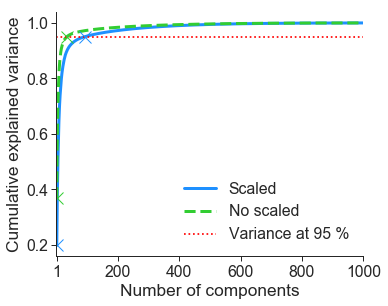

In [35]:
X, Y, Y_train_binarized, Y_test_binarized,_,_,_,_ = \
phd.saveFiles.load_results(key='vowels,nfilters32,ncepstra13,seed20',
                           subdir="ncc-b=1.019-power=3.000")

n_comp, n_comp_scaled, cev, cev_scaled = phd.methodsTFM.PCA_scaled_noscaled_components(X,1000,0.95)

fig = plt.figure(figsize=(5.5, 4.5))
x1=np.linspace(1,len(cev_scaled),len(cev_scaled))
x2=np.linspace(1,len(cev),len(cev))
plt.plot(x1,cev_scaled, 'dodgerblue',label='Scaled')
plt.plot(x2,cev,'limegreen', linestyle='--',label='No scaled')

#plot initial points:
plt.plot(x1[0],cev_scaled[0], 'x', markersize=12, color='dodgerblue')
plt.plot(x2[0],cev[0], 'x', markersize=12, color='limegreen')

plt.axhline(y=0.95, color='r', linestyle=':', lw = 1.7, label='Variance at 95 %')

#plot points at 95% variance:
plt.plot(x1[n_comp_scaled],cev_scaled[n_comp_scaled], 'x', markersize=12, color='dodgerblue')
plt.plot(x2[n_comp],cev[n_comp], 'x', markersize=12, color='limegreen')

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

x_ticks=np.arange(0,1001,200)
x_ticks[0] = 1

plt.xticks(x_ticks);
plt.xlim(0,1000)
plt.gca().set_xlim(right=1000)
lgd=plt.legend(loc='lower right', fancybox=True, shadow=False, frameon=False)
plt.show()

fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/PCA-scaled-noscaled-vowels.svg',
           bbox_inches='tight', format='svg')

The file consonants,nfilters32,ncepstra13,seed20.h5 has the next items:
data_ncc
data_ncc/test
data_ncc/train
y_labels
y_labels/y_test_binarized
y_labels/y_train_binarized
('X_train size: ', (1277, 2795))
('Y_train size: ', (1277,))
('Y_test size: ', (660, 2795))
('X_test size: ', (660,))
('Full dataset: ', (1937, 2795))
('Full labels: ', (1937,))
The file vowels,nfilters32,ncepstra13,seed20.h5 has the next items:
data_ncc
data_ncc/test
data_ncc/train
y_labels
y_labels/y_test_binarized
y_labels/y_train_binarized
('X_train size: ', (865, 3679))
('Y_train size: ', (865,))
('Y_test size: ', (458, 3679))
('X_test size: ', (458,))
('Full dataset: ', (1323, 3679))
('Full labels: ', (1323,))


<Figure size 1080x936 with 0 Axes>

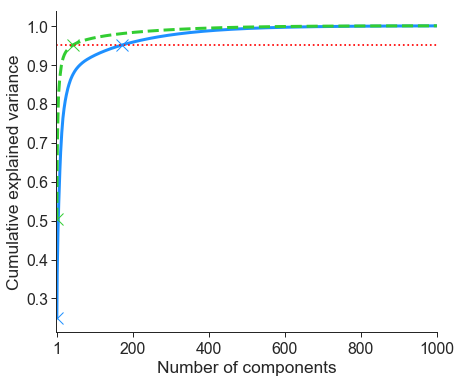

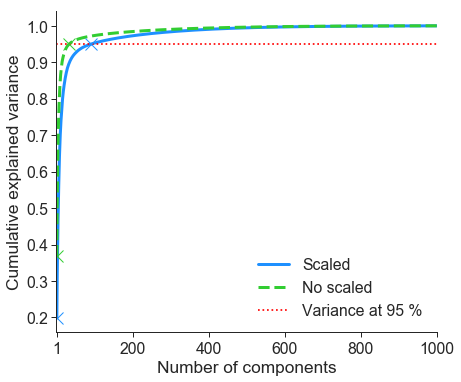

In [37]:
phd.plots.setup(figsize=(15, 13))
sns.set_style({"axes.spines.right": False})
sns.set_style({"axes.spines.top": False})
sns.set_context("paper",font_scale=1.8, rc={"lines.linewidth": 3})
sns.despine()

X, Y, Y_train_binarized, Y_test_binarized,_,_,_,_ = \
phd.saveFiles.load_results(key='consonants,nfilters32,ncepstra13,seed20',
                           subdir="ncc-b=1.019-power=3.000")

X2, Y2, Y_train_binarized2, Y_test_binarized2,_,_,_,_ = \
phd.saveFiles.load_results(key='vowels,nfilters32,ncepstra13,seed20',
                           subdir="ncc-b=1.019-power=3.000")

n_comp, n_comp_scaled, cev, cev_scaled = phd.methodsTFM.PCA_scaled_noscaled_components(X,1000,0.95)

fig = plt.figure(); plt.subplot(221); ax1 = plt.gca()

x1=np.linspace(1,len(cev_scaled),len(cev_scaled))
x2=np.linspace(1,len(cev),len(cev))
plt.plot(x1,cev_scaled, 'dodgerblue',label='Scaled')
plt.plot(x2,cev,'limegreen', linestyle='--',label='No scaled')

#plot initial points:
plt.plot(x1[0],cev_scaled[0], 'x', markersize=12, color='dodgerblue')
plt.plot(x2[0],cev[0], 'x', markersize=12, color='limegreen')

plt.axhline(y=0.95, color='r', linestyle=':', lw = 1.7, label='Variance at 95 %')

#plot points at 95% variance:
plt.plot(x1[n_comp_scaled],cev_scaled[n_comp_scaled], 'x', markersize=12, color='dodgerblue')
plt.plot(x2[n_comp],cev[n_comp], 'x', markersize=12, color='limegreen')

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

x_ticks=np.arange(0,1001,200)
x_ticks[0] = 1

plt.xticks(x_ticks);
plt.xlim(0,1000)
ax1.set_xlim(right=1000)
plt.show()


plt.subplot(222); ax2 = plt.gca()

n_comp, n_comp_scaled, cev, cev_scaled = phd.methodsTFM.PCA_scaled_noscaled_components(X2,1000,0.95)

x1=np.linspace(1,len(cev_scaled),len(cev_scaled))
x2=np.linspace(1,len(cev),len(cev))
plt.plot(x1,cev_scaled, 'dodgerblue',label='Scaled')
plt.plot(x2,cev,'limegreen', linestyle='--',label='No scaled')

#plot initial points:
plt.plot(x1[0],cev_scaled[0], 'x', markersize=12, color='dodgerblue')
plt.plot(x2[0],cev[0], 'x', markersize=12, color='limegreen')

plt.axhline(y=0.95, color='r', linestyle=':', lw = 1.7, label='Variance at 95 %')

#plot points at 95% variance:
plt.plot(x1[n_comp_scaled],cev_scaled[n_comp_scaled], 'x', markersize=12, color='dodgerblue')
plt.plot(x2[n_comp],cev[n_comp], 'x', markersize=12, color='limegreen')

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

x_ticks=np.arange(0,1001,200)
x_ticks[0] = 1

plt.xticks(x_ticks);
plt.xlim(0,1000)
ax2.set_xlim(right=1000)

lgd=plt.legend(loc='lower right', fancybox=True, shadow=False, frameon=False)
plt.show()